In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!nvidia-smi

Wed Sep  1 22:21:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.96       Driver Version: 471.96       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:07:00.0  On |                  N/A |
|  0%   47C    P8    36W / 370W |  11164MiB / 24576MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import train
import os
import numpy as np
import matplotlib.pyplot as plt

# Load
trainer = train.Trainer()
trainer.load_dataloader()
trainer.load_model(state_dict_path=None)
trainer.load_loss_layer()
trainer.load_optimizer_scheduler()
print('\n[Trainer Info]')
print(trainer)

Training with the following device : cuda
Creating folder... Path : base1
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'base1'


Enter y to delete C:\Users\home\Documents\Workspace\github\perceiver-io-trainer-pytorch-v2\base1 folder! Otherwise exit :  y


Load y0_list... Done.
Found 2 sequences : ['EN', 'MM']
--------- 001/2
Loading Dataset... Sequence : EN
            total_atom_num : 244233, total_dipeptides_num : 7401, atom_num : 33
            train_num : 1850, valid_num : 1295, test_num : 555,
            x_train_shape : (1850, 51, 80), x_valid_shape : (1295, 51, 80), x_test_shape : (555, 51, 80)
            y_train_len : 1850, y_valid_len = 1295, y_test_len = 555
            
--------- 002/2
Loading Dataset... Sequence : MM
            total_atom_num : 391830, total_dipeptides_num : 10590, atom_num : 37
            train_num : 2648, valid_num : 1853, test_num : 794,
            x_train_shape : (2648, 51, 80), x_valid_shape : (1853, 51, 80), x_test_shape : (794, 51, 80)
            y_train_len : 2648, y_valid_len = 1853, y_test_len = 794
            
All Datasets Loaded... Total Dataset : 
            x_train_shape : (4498, 51, 80), x_valid_shape : (3148, 51, 80), x_test_shape : (1349, 51, 80)
            y_train_len : 4498, y_vali

Epoch:      0/30000 Train_loss: 10.674026 Valid_loss: 7.848069, lr: 0.000600, Min_rmse: 100.000000, Last_chk_epoch: 0, Use_time: 3, Left_time: 00h 00m
Mean Absolute Error (MAE) = 2.791452 eV
Root Mean Squared Error (RMSE) = 2.795971 eV
Root Mean Squared Error (RMSE) = 64.477891 kcal/mol


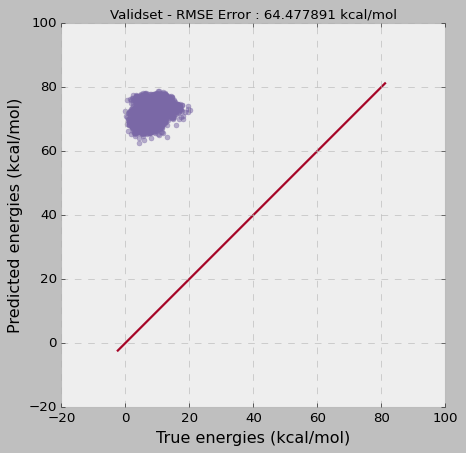

Epoch:      4/30000, batch: 001/4, Train_loss: 1.7144116

KeyboardInterrupt: 

In [2]:
trainer.epoch_print_range = 20
# Train
trainer.train(print_plot=True)  # If you are training in Command Line Interface, set print_plot to False.

if False:  # Run this when you want to see plots separately.
    print('Testset RMSE Error Plot')
    trainer.plot_dataset(trainer.test_loader)
    trainer.plot_losses()

In [ ]:
y = trainer.trainset[:][1].squeeze().tolist()
x = range(len(y))

plt.figure(figsize=(15,15))
plt.scatter(x, y)
plt.yticks(range(-15, 15, 5))
plt.show()

In [4]:
trainer.input_preprocess_values_list

{'EN': {'atom_num': 33,
  'type': 'standardization',
  'mean': 0.00014717476554013416,
  'std': 0.00020725475327084428,
  'data_shape': (7401, 51, 80)},
 'MM': {'atom_num': 37,
  'type': 'standardization',
  'mean': 0.00014560315875871284,
  'std': 0.00020932520590437315,
  'data_shape': (10590, 51, 80)}}

In [59]:
batch_x, y, seqs = next(iter(trainer.train_loader))

In [50]:
batch_x = batch_x.reshape(-1, 1, batch_x.shape[-1])

In [43]:
batch_x = batch_x.reshape(-1,x.shape[-1])
# y = y.to(device)

# queries = torch.ones(len(batch_x), 1, 80).to(device)
# predicted = trainer.model(batch_x, queries=queries).squeeze()

In [48]:
batch_x.reshape(-1) == torch.zeros(80)

RuntimeError: The size of tensor a (2088960) must match the size of tensor b (80) at non-singleton dimension 0

In [19]:
(batch_x==torch.zeros(1, 80).to(device))

torch.Size([26112, 1, 80])

In [20]:
zero_index = []
for x in batch_x:
    tf = (x==torch.zeros(1, 80).to(device)).all()
    zero_index.append(tf)

In [151]:
np.unique(a.tolist())

array([    0,     1,     2, ..., 26109, 26110, 26111])

In [144]:
batch_x[a]

torch.Size([718832, 1, 80])

In [61]:
batch_x, y, seqs = next(iter(trainer.train_loader))
batch_x = batch_x.reshape(-1, 1, batch_x.shape[-1]).to(device)

queries = torch.ones(len(batch_x), 1, 80).to(device)
predicted = trainer.model(batch_x, queries=queries).squeeze()

index = 0
predicted_total_energies = torch.Tensor().to(device)
for seq in seqs:
    atom_num = trainer.input_preprocess_values_list[seq]['atom_num']
    predicted_total_energies = torch.hstack([predicted_total_energies, torch.sum(predicted[index:index+atom_num])])
    index += 51
    
predicted_total_energies.shape

torch.Size([512])

In [58]:
predicted_total_energies.shape

torch.Size([512])

In [63]:
predicted_total_energies.shape

torch.Size([512, 1])

In [64]:
trainer.loss(predicted_total_energies, y)

tensor(12.9193, device='cuda:0', grad_fn=<MseLossBackward>)